#### This code fetches historical stock data for AMD, Intel, and Nvidia, creates a portfolio DataFrame, calculates its value and daily percentage change, filters it for market open dates, and rounds values for consistency before displaying the data.

#### In this code, we utilize Matplotlib to plot the performance of our portfolio over the last five years. We plot the portfolio unit price against the date, showcasing how the value of our portfolio has evolved over time. The resulting graph provides a visual representation of our portfolio's performance, aiding in analysis and decision-making. We then created a JPEG of the plot.

In [3]:
import pandas as pd
import yfinance as yf
from pandas_market_calendars import get_calendar
from pandas.tseries.offsets import CustomBusinessDay

# Define the symbol for SOXX ETF
symbols = ['SOXX']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 5 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data for SOXX ETF
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbol
portfolio_df.columns = symbols

# Add a column for the number of shares (assuming 1000 shares for simplicity)
portfolio_df['Shares_SOXX'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['SOXX'] * portfolio_df['Shares_SOXX'])

# Calculate the portfolio unit price in USD
portfolio_df['Portfolio_Close_Price'] = (portfolio_df['Portfolio_Value'] / 1000)

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Define a custom business day object for Monday to Friday
monday_to_friday_bday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')

# Generate a date range using the custom business day object
market_open_dates = pd.date_range(start=start_date, end=end_date, freq=monday_to_friday_bday)

# Filter the data to include only market open dates
portfolio_df = portfolio_df[portfolio_df.index.isin(market_open_dates)]

# Round the portfolio value columns to 2 decimal places
portfolio_df = portfolio_df.round({'SOXX': 2, 'Portfolio_Value': 2, 'Portfolio_Close_Price': 2})

# Print the first few rows of the portfolio DataFrame
display(portfolio_df.head())
display(portfolio_df.tail())

ModuleNotFoundError: No module named 'pandas_market_calendars'

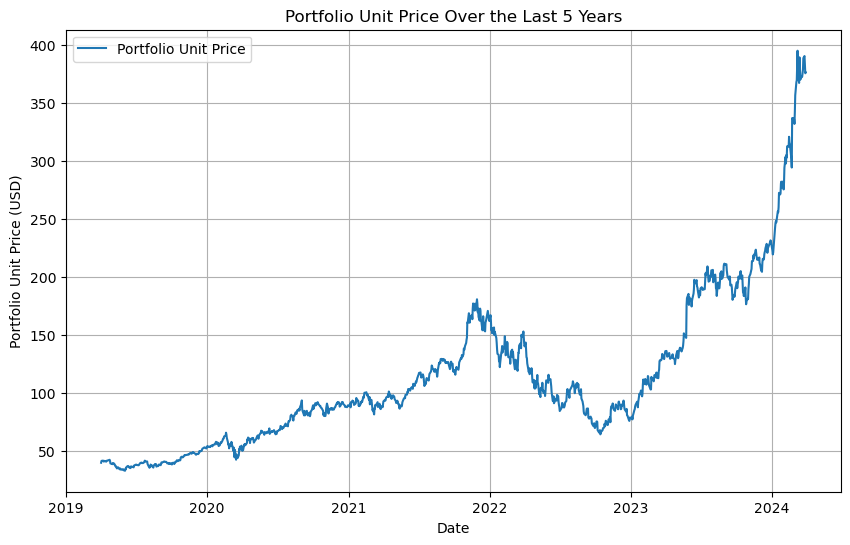

In [85]:
import matplotlib.pyplot as plt

# Plot the portfolio value for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Close_Price'], label='Portfolio Unit Price')
plt.title('Portfolio Unit Price Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Portfolio Unit Price (USD)')
plt.legend()
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('portfolio_unit_price.jpeg', dpi=300, bbox_inches='tight')

plt.show()

#### In this segment, we calculate the daily percentage change in the portfolio value and visualize it over the last five years. By computing the percentage change in the portfolio's unit price on a daily basis, we gain insights into the volatility and trends of our portfolio's performance. The resulting plot provides a clear depiction of the daily fluctuations in our portfolio's value, aiding in risk assessment and investment strategy evaluation. We then created a JPEG of the plot.

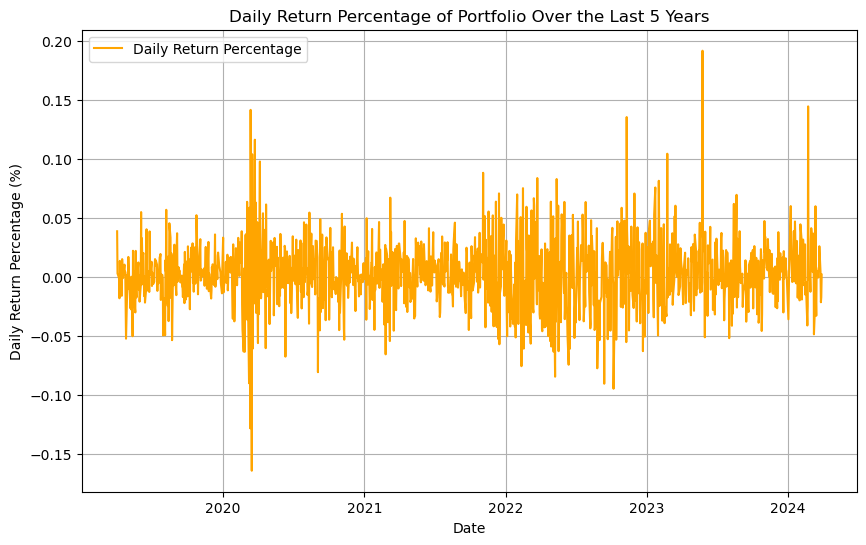

In [87]:
# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Plot the daily return percentage for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of Portfolio Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('portfolio_daily_return_pct.jpeg', dpi=300, bbox_inches='tight')

plt.show()

#### Here, we compute the daily percentage change in the portfolio's close price and drop any resulting NaN values. This calculation allows us to assess the daily fluctuations in the portfolio's value with respect to its close price. By eliminating NaN values, we ensure consistency in our data for further analysis and interpretation. Below are the first few rows of the updated portfolio DataFrame, reflecting the calculated daily percentage change in the portfolio's close price.

In [135]:
# Calculate daily percentage change in portfolio_close_price
portfolio_df['Daily_Return_Close_Price_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Print the latest few rows of the portfolio DataFrame
portfolio_df.tail()

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage
Date,,,,,,,,,,
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,388.37,0.026122,0.026131
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16,0.004609,0.004609
2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98,381.82,-0.021367,-0.021376
2024-03-27,179.59,43.77,902.50,1000,1000,1000,1125860.00,375.29,-0.017120,-0.017102
2024-03-28,180.49,44.17,903.56,1000,1000,1000,1128220.00,376.07,0.002096,0.002078


#### Below are the columns present in the portfolio DataFrame after the calculations. These columns provide comprehensive information about the portfolio's composition and performance, facilitating further analysis and decision-making.

In [136]:
portfolio_df.columns

Index(['AMD', 'INTC', 'NVDA', 'Shares_AMD', 'Shares_INTC', 'Shares_NVDA',
       'Portfolio_Value', 'Portfolio_Close_Price', 'Daily_Return_Percentage',
       'Daily_Return_Close_Price_Percentage'],
      dtype='object')

#### In this segment, we utilize the extract_features function from the tsfresh library to extract features from the portfolio DataFrame. Prior to feature extraction, we reset the index to ensure a unique identifier for each timestamp. The extracted features provide valuable insights into the time series data, enabling further analysis and modeling

In [112]:
from tsfresh import extract_features

# Reset index to have a unique identifier for each timestamp
portfolio_df.reset_index(inplace=True)

# Extract features
extracted_features = extract_features(portfolio_df, column_id='Date')

# Print the extracted features
print(extracted_features.head())

Feature Extraction: 100%|██████████| 20/20 [02:41<00:00,  8.09s/it]


            level_0__variance_larger_than_standard_deviation  \
2019-04-05                                               0.0   
2019-04-08                                               0.0   
2019-04-09                                               0.0   
2019-04-10                                               0.0   
2019-04-11                                               0.0   

            level_0__has_duplicate_max  level_0__has_duplicate_min  \
2019-04-05                         0.0                         0.0   
2019-04-08                         0.0                         0.0   
2019-04-09                         0.0                         0.0   
2019-04-10                         0.0                         0.0   
2019-04-11                         0.0                         0.0   

            level_0__has_duplicate  level_0__sum_values  level_0__abs_energy  \
2019-04-05                     0.0                  0.0                  0.0   
2019-04-08                     0.0

In [113]:
extracted_features.tail()

,level_0__variance_larger_than_standard_deviation,level_0__has_duplicate_max,level_0__has_duplicate_min,level_0__has_duplicate,level_0__sum_values,level_0__abs_energy,level_0__mean_abs_change,level_0__mean_change,level_0__mean_second_derivative_central,level_0__median,...,Daily_Return_Close_Price_Percentage__fourier_entropy__bins_5,Daily_Return_Close_Price_Percentage__fourier_entropy__bins_10,Daily_Return_Close_Price_Percentage__fourier_entropy__bins_100,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_3__tau_1,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_4__tau_1,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_5__tau_1,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_6__tau_1,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_7__tau_1,Daily_Return_Close_Price_Percentage__query_similarity_count__query_None__threshold_0.0,Daily_Return_Close_Price_Percentage__mean_n_absolute_max__number_of_maxima_7
2024-03-22,0.0,0.0,0.0,0.0,1249.0,1560001.0,NaN,NaN,NaN,1249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-25,0.0,0.0,0.0,0.0,1250.0,1562500.0,NaN,NaN,NaN,1250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-26,0.0,0.0,0.0,0.0,1251.0,1565001.0,NaN,NaN,NaN,1251.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-27,0.0,0.0,0.0,0.0,1252.0,1567504.0,NaN,NaN,NaN,1252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-28,0.0,0.0,0.0,0.0,1253.0,1570009.0,NaN,NaN,NaN,1253.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Here, we preprocess the extracted features to remove columns with null values and those with zero variance, which might not contribute significantly to the analysis or modeling process. By filtering out such columns, we ensure that only relevant and informative features are retained for further processing.

In [114]:
# Remove columns with null values
extracted_features = extracted_features.dropna(axis=1)

# Remove columns with zero variance
extracted_features = extracted_features.loc[:, extracted_features.std() > 0]

extracted_features.tail()

,level_0__sum_values,level_0__abs_energy,level_0__median,level_0__mean,level_0__root_mean_square,level_0__maximum,level_0__absolute_maximum,level_0__minimum,level_0__quantile__q_0.1,level_0__quantile__q_0.2,...,"Daily_Return_Close_Price_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Close_Price_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Close_Price_Percentage__fft_coefficient__attr_""real""__coeff_0","Daily_Return_Close_Price_Percentage__fft_coefficient__attr_""abs""__coeff_0","Daily_Return_Close_Price_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Close_Price_Percentage__value_count__value_0,Daily_Return_Close_Price_Percentage__range_count__max_0__min_-1000000000000.0,Daily_Return_Close_Price_Percentage__range_count__max_1000000000000.0__min_0,Daily_Return_Close_Price_Percentage__count_above__t_0,Daily_Return_Close_Price_Percentage__count_below__t_0
2024-03-22,1249.0,1560001.0,1249.0,1249.0,1249.0,1249.0,1249.0,1249.0,1249.0,1249.0,...,0.007167,0.005068,0.026131,0.026131,0.0,0.0,0.0,1.0,1.0,0.0
2024-03-25,1250.0,1562500.0,1250.0,1250.0,1250.0,1250.0,1250.0,1250.0,1250.0,1250.0,...,0.001264,0.000894,0.004609,0.004609,0.0,0.0,0.0,1.0,1.0,0.0
2024-03-26,1251.0,1565001.0,1251.0,1251.0,1251.0,1251.0,1251.0,1251.0,1251.0,1251.0,...,-0.005863,-0.004146,-0.021376,0.021376,180.0,0.0,1.0,0.0,0.0,1.0
2024-03-27,1252.0,1567504.0,1252.0,1252.0,1252.0,1252.0,1252.0,1252.0,1252.0,1252.0,...,-0.004691,-0.003317,-0.017102,0.017102,180.0,0.0,1.0,0.0,0.0,1.0
2024-03-28,1253.0,1570009.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,...,0.000570,0.000403,0.002078,0.002078,0.0,0.0,0.0,1.0,1.0,0.0


#### To eliminate duplicate columns in the DataFrame, we first transpose it to facilitate identifying duplicates. Then, we remove the duplicated columns and reset the index, ensuring a clean DataFrame without redundant data.

In [115]:
# Transpose the DataFrame to easily identify duplicate columns
transposed_df = extracted_features.T

# Find duplicated columns
duplicated_columns = transposed_df[transposed_df.duplicated()]

# Remove duplicate columns from the original DataFrame
extracted_features = extracted_features.drop(columns=duplicated_columns.index)

# Reset the index of the DataFrame
extracted_features.reset_index(drop=True, inplace=True)

# Print the DataFrame after removing duplicate columns
extracted_features.tail()

,level_0__sum_values,level_0__abs_energy,"level_0__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","level_0__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","level_0__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","level_0__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",level_0__value_count__value_0,level_0__value_count__value_1,AMD__sum_values,AMD__abs_energy,...,Daily_Return_Percentage__root_mean_square,"Daily_Return_Percentage__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Percentage__value_count__value_0,Daily_Return_Percentage__range_count__max_0__min_-1000000000000.0,Daily_Return_Percentage__range_count__max_1000000000000.0__min_0,Daily_Return_Percentage__count_below__t_0
1249,1249.0,1560001.0,766.001007,484.461575,342.566065,242.230787,0.0,0.0,179.65,32274.1225,...,0.026131,0.016026,0.010136,0.007167,0.005068,0.0,0.0,0.0,1.0,0.0
1250,1250.0,1562500.0,766.614299,484.849454,342.840337,242.424727,0.0,0.0,178.63,31908.6769,...,0.004609,0.002827,0.001788,0.001264,0.000894,0.0,0.0,0.0,1.0,0.0
1251,1251.0,1565001.0,767.227590,485.237334,343.114609,242.618667,0.0,0.0,177.87,31637.7369,...,0.021376,-0.013110,-0.008291,-0.005863,-0.004146,180.0,0.0,1.0,0.0,1.0
1252,1252.0,1567504.0,767.840882,485.625213,343.388881,242.812607,0.0,0.0,179.59,32252.5681,...,0.017102,-0.010489,-0.006634,-0.004691,-0.003317,180.0,0.0,1.0,0.0,1.0
1253,1253.0,1570009.0,768.454173,486.013093,343.663154,243.006546,0.0,0.0,180.49,32576.6401,...,0.002078,0.001275,0.000806,0.000570,0.000403,0.0,0.0,0.0,1.0,0.0


#### This code calculates the day-to-day percentage change for the 'Portfolio_Value__sum_values' column in the DataFrame 'extracted_features'. It then removes the first row, as it will contain NaN values resulting from the percentage change calculation.

In [116]:
# Calculate percentage change day-to-day for 'Portfolio_Value__sum_values' column
extracted_features['Portfolio_Value__sum_values_pct_change'] = extracted_features['Portfolio_Value__sum_values'].pct_change()

# Drop the first row since it will have NaN for the percentage change
extracted_features = extracted_features.iloc[1:]

# Print the updated DataFrame
extracted_features.tail()

,level_0__sum_values,level_0__abs_energy,"level_0__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","level_0__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","level_0__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","level_0__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",level_0__value_count__value_0,level_0__value_count__value_1,AMD__sum_values,AMD__abs_energy,...,"Daily_Return_Percentage__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Percentage__value_count__value_0,Daily_Return_Percentage__range_count__max_0__min_-1000000000000.0,Daily_Return_Percentage__range_count__max_1000000000000.0__min_0,Daily_Return_Percentage__count_below__t_0,Portfolio_Value__sum_values_pct_change
1249,1249.0,1560001.0,766.001007,484.461575,342.566065,242.230787,0.0,0.0,179.65,32274.1225,...,0.016026,0.010136,0.007167,0.005068,0.0,0.0,0.0,1.0,0.0,0.026122
1250,1250.0,1562500.0,766.614299,484.849454,342.840337,242.424727,0.0,0.0,178.63,31908.6769,...,0.002827,0.001788,0.001264,0.000894,0.0,0.0,0.0,1.0,0.0,0.004609
1251,1251.0,1565001.0,767.227590,485.237334,343.114609,242.618667,0.0,0.0,177.87,31637.7369,...,-0.013110,-0.008291,-0.005863,-0.004146,180.0,0.0,1.0,0.0,1.0,-0.021367
1252,1252.0,1567504.0,767.840882,485.625213,343.388881,242.812607,0.0,0.0,179.59,32252.5681,...,-0.010489,-0.006634,-0.004691,-0.003317,180.0,0.0,1.0,0.0,1.0,-0.017120
1253,1253.0,1570009.0,768.454173,486.013093,343.663154,243.006546,0.0,0.0,180.49,32576.6401,...,0.001275,0.000806,0.000570,0.000403,0.0,0.0,0.0,1.0,0.0,0.002096


In [117]:
extracted_features.columns

Index(['level_0__sum_values', 'level_0__abs_energy',
       'level_0__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'level_0__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'level_0__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'level_0__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'level_0__value_count__value_0', 'level_0__value_count__value_1',
       'AMD__sum_values', 'AMD__abs_energy', 'AMD__benford_correlation',
       'AMD__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'AMD__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'AMD__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'AMD__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'INTC__sum_values', 'INTC__abs_energy', 'INTC__benford_correlation',
       'INTC__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'INTC__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'INTC_

#### This code segment splits extracted data via TSFRESH into features and target variables, trains a linear regression model on the features, and then generates future features for the next 30 days. Finally, it predicts the daily percentage change in 'Portfolio_Value__sum_values' for each of the next 30 days using the trained model.

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Split the data into features (X) and target variable (y)
X = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change'])
y = extracted_features['Portfolio_Value__sum_values_pct_change']

# 2. Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# 3. Generate future features for the next 30 days
next_30_days_features = pd.DataFrame(index=next_30_days, columns=X.columns)

# Fill in the first row of next_30_days_features with the last available features
next_30_days_features.iloc[0] = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change']).iloc[-1]

# Generate features for the next 29 days
for i in range(1, 30):
    # Randomly generate features for the next day
    random_features = np.random.rand(1, len(next_30_days_features.columns))
    
    # Assign the randomly generated features to the ith row of next_30_days_features
    next_30_days_features.iloc[i] = random_features

# 4. Use the trained model to predict the 30-day percentage change in 'Portfolio_Value__sum_values'
future_pct_change_predictions = model.predict(next_30_days_features)

print("Future Predictions for the next 30 days:")
print(future_pct_change_predictions)


Future Predictions for the next 30 days:
[0.00205805 0.86302642 0.73574782 0.95572674 0.99475467 1.10856607
 0.50274145 0.48237476 1.16257518 0.50971664 0.67600849 0.69289868
 0.79173604 0.32487208 0.3836597  0.41778267 0.3961248  1.1843427
 0.69449718 0.61868949 1.31683128 0.65075944 0.60721817 0.7108515
 0.64374666 1.15256507 0.9899622  0.58210831 0.70107743 0.53176411]


In [121]:
# Convert predictions array to DataFrame
future_predictions_df = pd.DataFrame(future_pct_change_predictions, index=next_30_days, columns=['Predicted_Pct_Change'])

# Save DataFrame as CSV
future_predictions_df.to_csv('TSFRESH_LR.csv')

print("Future Predictions for the next 30 days:")
future_predictions_df.tail(30)

Future Predictions for the next 30 days:


,Predicted_Pct_Change
1970-01-01 00:00:00.000001246,0.002058
1970-01-02 00:00:00.000001246,0.863026
1970-01-03 00:00:00.000001246,0.735748
1970-01-04 00:00:00.000001246,0.955727
1970-01-05 00:00:00.000001246,0.994755
1970-01-06 00:00:00.000001246,1.108566
1970-01-07 00:00:00.000001246,0.502741
1970-01-08 00:00:00.000001246,0.482375
1970-01-09 00:00:00.000001246,1.162575
1970-01-10 00:00:00.000001246,0.509717


#### Linear regression model trained on historical data predicts daily percentage change in 'Portfolio_Value__sum_values' for the next 30 days using engineered features. Performance metrics such as R^2 score, RMSE, and MAE are evaluated on a test set from historical data to assess model accuracy

In [124]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split the historical data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("Future Predictions for the next 30 days:")
print(future_pct_change_predictions)

# Save output as a text file
with open('TSFRESH_LR.txt', 'w') as f:
    f.write("R^2 Score: {}\n".format(r2))
    f.write("RMSE: {}\n".format(rmse))
    f.write("MAE: {}\n".format(mae))
    f.write("Future Predictions for the next 30 days:\n")
    for prediction in future_pct_change_predictions:
        f.write(str(prediction) + '\n')

R^2 Score: 0.9999984360358785
RMSE: 3.696525500747458e-05
MAE: 2.8212669840416787e-05
Future Predictions for the next 30 days:
[0.00205805 0.86302642 0.73574782 0.95572674 0.99475467 1.10856607
 0.50274145 0.48237476 1.16257518 0.50971664 0.67600849 0.69289868
 0.79173604 0.32487208 0.3836597  0.41778267 0.3961248  1.1843427
 0.69449718 0.61868949 1.31683128 0.65075944 0.60721817 0.7108515
 0.64374666 1.15256507 0.9899622  0.58210831 0.70107743 0.53176411]


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Split the data into features (X) and target variable (y)
X = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change'])
y = extracted_features['Portfolio_Value__sum_values_pct_change']

# 2. Train a Random Forest regressor model
model = RandomForestRegressor()
model.fit(X, y)

# 3. Generate future features for the next 30 days
next_30_days_features = pd.DataFrame(index=next_30_days, columns=X.columns)

# Fill in the first row of next_30_days_features with the last available features
next_30_days_features.iloc[0] = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change']).iloc[-1]

# Generate features for the next 29 days
for i in range(1, 30):
    # Randomly generate features for the next day
    random_features = np.random.rand(1, len(next_30_days_features.columns))
    
    # Assign the randomly generated features to the ith row of next_30_days_features
    next_30_days_features.iloc[i] = random_features

# 4. Use the trained model to predict the 30-day percentage change in 'Portfolio_Value__sum_values'
future_pct_change_predictions = model.predict(next_30_days_features)

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Make predictions on the testing set
y_pred = model.predict(X_test)

# 7. Compute R^2 score
r2 = r2_score(y_test, y_pred)

# 8. Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 9. Compute MAE
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

print("Future Predictions for the next 30 days using Random Forest:")
print(future_pct_change_predictions)


R^2 Score: 0.9972321979464641
RMSE: 0.001555062423646802
MAE: 0.0001710194843764203
Future Predictions for the next 30 days using Random Forest:
[0.00208123 0.1536302  0.14602545 0.11592963 0.1605186  0.13997668
 0.12948888 0.15004027 0.15029071 0.14056769 0.15319036 0.14270977
 0.15741252 0.15688253 0.15387307 0.12952738 0.13688241 0.13465474
 0.15384405 0.14012144 0.14076491 0.13464449 0.13673046 0.15017154
 0.14026179 0.15020056 0.14214978 0.13468476 0.15758414 0.16037474]


In [128]:
# Convert future predictions array to DataFrame
future_predictions_df = pd.DataFrame(future_pct_change_predictions, columns=['Predicted_Pct_Change'])

# Save DataFrame to CSV
future_predictions_df.to_csv('TSFRESH_RF.csv', index=False)

In [126]:
# Save output as a text file
with open('TSFRESH_RF.txt', 'w') as f:
    f.write("R^2 Score: {}\n".format(r2))
    f.write("RMSE: {}\n".format(rmse))
    f.write("MAE: {}\n".format(mae))
    f.write("Future Predictions for the next 30 days using Random Forest:\n")
    for prediction in future_pct_change_predictions:
        f.write(str(prediction) + '\n')


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split the data into features (X) and target variable (y)
X = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change'])
y = extracted_features['Portfolio_Value__sum_values_pct_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting regressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Evaluation Metrics:")
print("R^2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

# Predict the 30-day percentage change in 'Portfolio_Value__sum_values'
future_pct_change_predictions = model.predict(next_30_days_features)

print("\nFuture Predictions for the next 30 days using Gradient Boosting:")
print(future_pct_change_predictions)


Evaluation Metrics:
R^2 Score: 0.988269265351767
RMSE: 0.0032014219566424192
MAE: 0.00047186400711449417

Future Predictions for the next 30 days using Gradient Boosting:
[0.00198303 0.14197683 0.13206159 0.10311152 0.14197683 0.13754818
 0.1177236  0.14197683 0.14197683 0.13148134 0.14197683 0.1378999
 0.14197683 0.14197683 0.14197683 0.10387471 0.13274904 0.10528862
 0.14197683 0.13777031 0.10850661 0.12779897 0.12545972 0.14197683
 0.13091408 0.14197683 0.12779897 0.13754818 0.14197683 0.14197683]


In [130]:
# Open a text file for writing
with open('TSRESH_GB.txt', 'w') as f:
    # Write the evaluation metrics to the file
    f.write("Evaluation Metrics:\n")
    f.write("R^2 Score: {}\n".format(r2))
    f.write("RMSE: {}\n".format(rmse))
    f.write("MAE: {}\n".format(mae))

In [131]:
# Store future predictions in a DataFrame
future_predictions_df = pd.DataFrame({'Future_Predictions': future_pct_change_predictions})

# Save future predictions DataFrame to CSV
future_predictions_df.to_csv('TSFRESH_GB.csv', index=False)

### In this code segment, the dataset is split into training and testing sets for machine learning model training and evaluation. The steps involved are:

#### Defining Testing Days:
Testing days are defined as every 5th day within the dataset's time range. This periodic interval ensures a balanced distribution of data for testing.

#### Splitting Data:
The dataset is split into two subsets: training data and testing data.
Training data (train_df) consists of observations not included in the defined testing days, ensuring temporal separation.
Testing data (test_df) comprises observations occurring on the specified testing days.

#### Preparing Data for Machine Learning:
Features (X_train and X_test) and target variables (y_train and y_test) are extracted from the training and testing subsets, respectively.
Features include Previous_Return, Rolling_Mean, and Rolling_Std, representing the previous return percentage and rolling statistics calculated earlier.


In [137]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np


# Feature Extraction
portfolio_df['Previous_Return'] = portfolio_df['Daily_Return_Percentage'].shift(1)
portfolio_df['Rolling_Mean'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).mean()
portfolio_df['Rolling_Std'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
portfolio_df.dropna(inplace=True)

# Define the testing days (every 5th day)
testing_days = portfolio_df.index[::5]

# Split data into training and testing sets based on testing days
train_df = portfolio_df[~portfolio_df.index.isin(testing_days)]
test_df = portfolio_df[portfolio_df.index.isin(testing_days)]

# Prepare data for machine learning
X_train = train_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_train = train_df['Daily_Return_Percentage']
X_test = test_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_test = test_df['Daily_Return_Percentage']


In [138]:
portfolio_df

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage,Previous_Return,Rolling_Mean,Rolling_Std
Date,,,,,,,,,,,,,
2019-04-11,27.79,48.83,47.56,1000,1000,1000,124180.96,41.39,-0.001088,-0.001207,0.013629,0.005320,0.017458
2019-04-12,27.85,49.37,47.18,1000,1000,1000,124403.62,41.47,0.001793,0.001933,-0.001088,0.000035,0.009358
2019-04-15,27.33,49.25,45.86,1000,1000,1000,122442.63,40.81,-0.015763,-0.015915,0.001793,-0.002637,0.010929
2019-04-16,27.93,49.63,46.73,1000,1000,1000,124290.46,41.43,0.015091,0.015192,-0.015763,-0.000799,0.012804
2019-04-17,27.49,51.25,46.50,1000,1000,1000,125240.98,41.75,0.007648,0.007724,0.015091,0.000489,0.013185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,388.37,0.026122,0.026131,0.008706,0.002389,0.017720
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16,0.004609,0.004609,0.026122,0.007737,0.008645
2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98,381.82,-0.021367,-0.021376,0.004609,0.004321,0.014064


#### Model Training:
A linear regression model is instantiated and trained using the training data (X_train and y_train).

#### Model Evaluation:
The trained model's performance is evaluated using the testing data (X_test and y_test).
The R^2 score, indicating the proportion of variance explained by the model, is calculated.
The Mean Absolute Error (MAE), representing the average absolute difference between predicted and actual values, is computed.

#### Future Prediction:
Features for the next 30 days are generated, starting from the last available features in the training data.
Predictions for the future daily return percentages over the next 30 days are made using the trained linear regression model.
This process provides insights into the model's performance on unseen data and enables the forecasting of future portfolio performance based on historical trends and learned relationships

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Predict future daily return percentages for the next 30 days
last_features = X_train.tail(1)
next_30_days = pd.date_range(start=portfolio_df.index[-1], periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X_train.columns)
future_features.iloc[0] = last_features.values[0]

for i in range(1, 30):
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)

R^2 Score: 0.16920545866976033
Mean Absolute Error: 0.01751527545607614
Root Mean Squared Error: 0.023698964531068966
Future Predictions for the next 30 days:
[0.00480654 0.6495172  0.07871919 0.15950273 1.36461324 0.57505041
 1.45568059 1.4491611  0.12938688 0.19469144 0.31892078 0.53550982
 0.14872201 1.47224463 0.28712311 0.69788236 0.67617216 0.77043873
 1.36145165 1.06305188 0.55045386 0.77038268 0.56848929 0.45332536
 0.8459408  0.30415494 1.03788214 1.12910861 1.2884871  1.15377661]


In [141]:
# Create DataFrame for future predictions
future_predictions_df = pd.DataFrame({'Future_Predictions': future_predictions}, index=next_30_days)

# Save future predictions DataFrame to CSV
future_predictions_df.to_csv('SIMP_EXTRACT_LR.csv')

In [142]:
# Open a text file for writing
with open('SIMP_EXTRACT_LR.txt', 'w') as f:
    # Write the evaluation metrics to the file
    f.write("R^2 Score: {}\n".format(r2_score))
    f.write("Mean Absolute Error: {}\n".format(mae))
    f.write("Root Mean Squared Error: {}\n".format(rmse))

### This code segment utilizes Facebook's Prophet library to forecast the future performance of the portfolio. The process involves the following steps:

#### Daily Percentage Change Calculation:

Daily percentage change in portfolio value is calculated based on the Portfolio_Value column of the DataFrame.

#### Data Preparation for Prophet:

NaN values resulting from the calculation are dropped to ensure data consistency.
The DataFrame is prepared in a format suitable for Prophet, consisting of two columns: ds (date) and y (daily return percentage).

#### Model Fitting:

A Prophet model is instantiated and fitted using the prepared DataFrame.

#### Future Date Generation:

A DataFrame with future dates for the next 30 days is created using the make_future_dataframe method.

#### Prediction:

Using the fitted model, predictions are made for the future performance of the portfolio over the next 30 days.
The predicted values are extracted from the forecast DataFrame.

In [143]:
from prophet import Prophet

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Prepare data for Prophet
prophet_df = portfolio_df.reset_index()[['Date', 'Daily_Return_Percentage']].rename(columns={'Date': 'ds', 'Daily_Return_Percentage': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame with future dates for the next 30 days
future_dates = model.make_future_dataframe(periods=30)

# Make predictions using the fitted model
forecast = model.predict(future_dates)

# Extract the predicted values for the next 30 days
predicted_values = forecast[['ds', 'yhat']].tail(30)


23:15:58 - cmdstanpy - INFO - Chain [1] start processing
23:15:58 - cmdstanpy - INFO - Chain [1] done processing


In [144]:
# Display predicted return percentage values for the next 30 days (Prophet)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
1249,2024-03-29,0.382434,-3.190992,3.881404
1250,2024-03-30,0.626968,-3.385725,4.513855
1251,2024-03-31,0.589427,-2.758542,3.965364
1252,2024-04-01,0.722648,-2.732685,4.232306
1253,2024-04-02,0.489377,-3.027911,4.248215
1254,2024-04-03,0.332064,-3.545770,3.987093
1255,2024-04-04,0.568111,-2.804970,4.218427
1256,2024-04-05,0.091700,-3.542950,3.678370
1257,2024-04-06,0.324248,-3.130614,3.788491
1258,2024-04-07,0.278644,-3.275425,4.155336


In [145]:
# Extract the relevant columns from the forecast and select the last 30 rows
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

# Save the DataFrame to CSV
forecast_df.to_csv('PROPHET_PORTFOLIO.csv', index=False)

### In this section, predictions from both the linear regression model and the Prophet model are combined for comparison. The following steps are undertaken:

#### Conversion to DataFrame:

Predictions from the linear regression model (future_predictions) are converted into a DataFrame (future_predictions_df) with column name 'LR_Predictions'.

#### Concatenation:

The Prophet predictions DataFrame (predicted_values) and the linear regression predictions DataFrame are concatenated along the columns axis to create a combined predictions DataFrame (combined_predictions_df).

#### Index Alignment:

The index of the linear regression predictions DataFrame is set to match the index of the Prophet predictions DataFrame for alignment.

#### Displaying Combined Predictions:

The combined predictions DataFrame is displayed, providing a comparative view of predictions from both models over the next 30 days.

In [13]:
# Convert the future_predictions array to a DataFrame
future_predictions_df = pd.DataFrame(future_predictions, columns=['LR_Predictions'])

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Set the index of the future_predictions_df DataFrame to match the index of the predicted_values DataFrame
future_predictions_df.index = predicted_values.index

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Print the combined predictions DataFrame
combined_predictions_df.tail(30)


,ds,yhat,LR_Predictions
1249,2024-03-29,0.376646,0.004801
1250,2024-03-30,0.615893,0.269404
1251,2024-03-31,0.578164,1.397808
1252,2024-04-01,0.717598,1.469781
1253,2024-04-02,0.484048,1.276449
1254,2024-04-03,0.326104,0.656647
1255,2024-04-04,0.563337,1.229581
1256,2024-04-05,0.084671,0.926419
1257,2024-04-06,0.311975,0.773702
1258,2024-04-07,0.266235,1.229730


### This code segment employs a Random Forest Regression model to predict the future performance of the portfolio. The process involves the following steps:

#### Model Initialization:

A Random Forest Regression model is instantiated with 100 estimators and a random state of 42.

#### Model Training:

The model is trained using the training data (X_train and y_train).

#### Model Evaluation:

The model's performance is evaluated using the testing data to calculate the R^2 score and Mean Absolute Error (MAE), providing insights into its accuracy and reliability.

#### Future Prediction:

Predictions for the future daily return percentages over the next 30 days are made using the trained Random Forest Regression model (rf_model) and the generated future features.

#### This approach offers an alternative regression-based method for forecasting portfolio performance, allowing for comparison with previous linear regression and Prophet models

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Calculate the R^2 score of the model on the testing data
r2_score_rf = rf_model.score(X_test, y_test)
print("R^2 Score:", r2_score_rf)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error:", rmse)

# Make predictions for future dates
rf_predictions = rf_model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(rf_predictions)


R^2 Score: -0.07407430694934658
Mean Absolute Error: 0.01751527545607614
Root Mean Squared Error: 0.02694633581039286
Future Predictions for the next 30 days:
[-0.00188206  0.10945478  0.04760556  0.10945478  0.10945478  0.10945478
  0.10945478  0.10945478  0.08623113  0.10945478  0.10945478  0.10945478
  0.10945478  0.10945478  0.10945478  0.08375183  0.10945478  0.10945478
  0.10945478  0.10945478  0.10945478  0.10945478  0.10945478  0.10945478
  0.10945478  0.08623113  0.10945478  0.10945478  0.10945478  0.06619757]


In [147]:
# Create a DataFrame for the future predictions
future_predictions_df = pd.DataFrame({'Future_Predictions': rf_predictions}, index=next_30_days)

# Save the DataFrame to CSV
future_predictions_df.to_csv('SIMP_EXTRACT_RF.csv')

In [148]:
# Open a text file for writing
with open('SIMP+EXTRACT_RF.txt', 'w') as f:
    # Write the evaluation metrics to the file
    f.write("R^2 Score: {}\n".format(r2_score_rf))
    f.write("Mean Absolute Error: {}\n".format(mae))
    f.write("Root Mean Squared Error: {}\n".format(rmse))

### In this section, predictions from the Random Forest Regression model are incorporated alongside the predictions from the linear regression and Prophet models. 

In [15]:
# Convert the future_predictions array to a DataFrame for Random Forest predictions
rf_predictions_df = pd.DataFrame(rf_predictions, index=future_predictions_df.index, columns=['RF_Predictions'])

# Concatenate the Prophet predictions DataFrame with the Random Forest predictions DataFrame
combined_predictions_df = pd.concat([combined_predictions_df, rf_predictions_df], axis=1)

# Print the updated combined predictions DataFrame
combined_predictions_df.tail(30)

combined_predictions_df.to_csv('combined_predictions_A.csv')

In [33]:
combined_predictions_df.to_csv('combined_predictions_B.csv')

In [31]:
print("30 day predictions and score using M-F")

print("R^2 Score (Linear Regression)", r2_score)

print("R^2 Score (Random Forest):", r2_score_rf)

display(combined_predictions_df.tail(30))


30 day predictions and score using M-F
R^2 Score (Linear Regression) 0.16920526631558885
R^2 Score (Random Forest): -0.07238207612089931


,ds,yhat,LR_Predictions,RF_Predictions
1249,2024-03-29,0.376646,0.004801,-0.001283
1250,2024-03-30,0.615893,0.269404,0.106588
1251,2024-03-31,0.578164,1.397808,0.106588
1252,2024-04-01,0.717598,1.469781,0.106588
1253,2024-04-02,0.484048,1.276449,0.106588
1254,2024-04-03,0.326104,0.656647,0.106588
1255,2024-04-04,0.563337,1.229581,0.106588
1256,2024-04-05,0.084671,0.926419,0.106588
1257,2024-04-06,0.311975,0.773702,0.106588
1258,2024-04-07,0.266235,1.229730,0.106588


In [40]:
# Load the CSV file into a DataFrame
loaded_df = pd.read_csv('combined_predictions_A.csv', index_col=0)

In [41]:
loaded_df.head()

,ds,yhat,LR_Predictions,RF_Predictions
1250,2024-03-29,0.407786,0.006499,-0.013281
1251,2024-03-30,0.456575,0.521574,0.122654
1252,2024-03-31,0.419091,1.246611,0.125655
1253,2024-04-01,0.751731,1.231153,0.125655
1254,2024-04-02,0.518070,0.001677,0.035597
